Task: Table Booking and Online Delivery

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv("Dataset.csv")
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Determine the percentage of restaurants that offer table booking and online delivery.

In [3]:
dataset["Has Table booking"].value_counts()

Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

In [4]:
dataset["Has Online delivery"].value_counts()

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [7]:
print("table booking: ",round((1158/(8393+1158))*100,2),"%")
print("online delivery: ",round((2451/(7100+2451))*100,2),"%")

table booking:  12.12 %
online delivery:  25.66 %


Compare the average ratings of restaurants
with table booking and those without.


In [10]:
dataset_with_table_booking=dataset[dataset["Has Table booking"]=="Yes"]
dataset_without_table_booking =dataset[dataset["Has Table booking"]=="No"]
print("Rows With Table: ",dataset_with_table_booking.shape)
print("Rows Without Table: ",dataset_without_table_booking.shape)

Rows With Table:  (1158, 21)
Rows Without Table:  (8393, 21)


In [12]:
print("Average Ratings: ")
print("With Table Booking: ",round(dataset_with_table_booking["Aggregate rating"].mean(),2))
print("Without Table Booking:", round(dataset_without_table_booking["Aggregate rating"].mean(),2))

Average Ratings: 
With Table Booking:  3.44
Without Table Booking: 2.56


Analyze the availability of online delivery among restaurants with different price ranges.

             No Delivery  Online Delivery
Price range                              
1               0.842259         0.157741
2               0.586894         0.413106
3               0.708097         0.291903
4               0.909556         0.090444


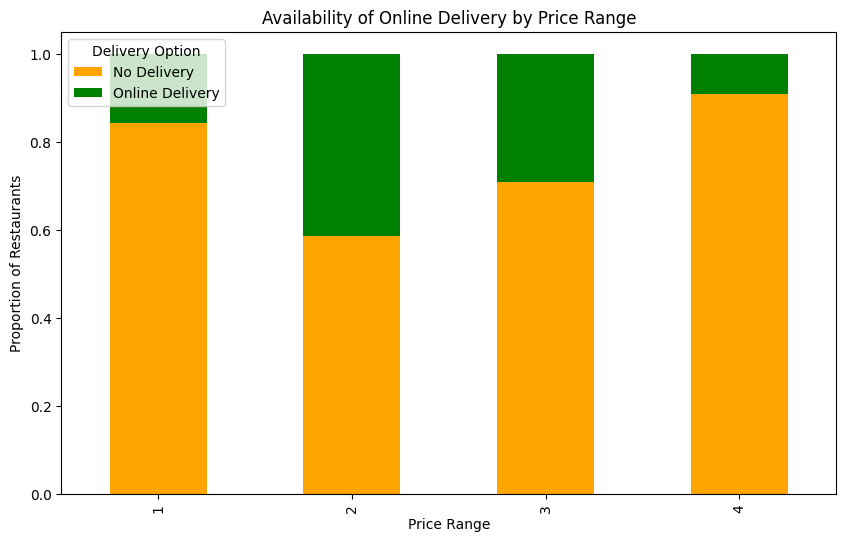

In [19]:


# Group the data by price range and calculate the proportion of restaurants offering online delivery
delivery_analysis = (dataset.groupby("Price range")["Has Online delivery"].value_counts(normalize=True).unstack())

# Rename the columns for clarity
delivery_analysis.columns = ["No Delivery", "Online Delivery"]

# Display the results
print(delivery_analysis)

delivery_analysis.plot(kind="bar", stacked=True, figsize=(10, 6), color=["orange", "green"])
plt.title("Availability of Online Delivery by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Proportion of Restaurants")
plt.legend(title="Delivery Option")
plt.show()
